In [ ]:
from anomalib.data import Folder
from anomalib.models import Patchcore
from anomalib.engine import Engine
from PIL import Image

Before doing anything with models, the first step is to get and prepare your data. The anomalib library comes with quite a few imports, one of which is the Folder method. This constructs a datamodule object, which is essentially just the training and testing data wrapped in an object. This object is how the anomalib engine will read in data and use it to fit the model.

The paths lead to folders of normal 'good' images and abnormal 'bent' images. I am also resizing the images as part of preprocessing, to make the training a little bit faster.

In [2]:
griddatamodule = Folder(
    name="gridtest",
    root="datasets/MVTec/grid",
    normal_dir="train/good",
    normal_test_dir="test/good",
    abnormal_dir="test/bent",
    mask_dir="ground_truth/bent",
    task="classification",
    image_size=(256, 256),
)

griddatamodule.setup()

The anomalib library has many different models, one of which is the PatchCore model. PatchCore is based off the CNN architecture. CNNs have many convolutional layers, and each is made up of filters. The PatchCore model extracts 'patches' from the middle layers of the network. Each patch takes a node (or group of nodes) in the same local area from each filter. These patches are then used to detect anomalies. The reason these patches are taken from the middle layers is because low layers are overly vague and generic, while high layers are too specific for general application.

These patches (or coresets) are then stored in a memory bank, which the model references to know what 'normal' patches look like. When an anomalous image is input, it compares the anomalous image's patches to the corresponding patches in the memory bank. If there is a significant enough difference between the two, it marks that patch (or group of patches) to be anomalous. If there are anomalous patches, then the image in its entirety is determined to be anomalous.

The cell below creates an anomalib PatchCore model, as well as an engine that will be use to fit and train the model.

In [ ]:
# Initialize the datamodule, model and engine
# datamodule = MVTec(category='grid', task='classification')
gmodel = Patchcore()
gengine = Engine(task="classification", pixel_metrics="AUROC")

# Train the model
gengine.fit(datamodule=griddatamodule, model=gmodel)

The below cell is a visualization of how the PatchCore model determines anomalous images. First, it takes in the original image. After analyzing the image, it makes a heatmap of the 'abnormal' patches of the image, then decides whether or not the image is anomalous.

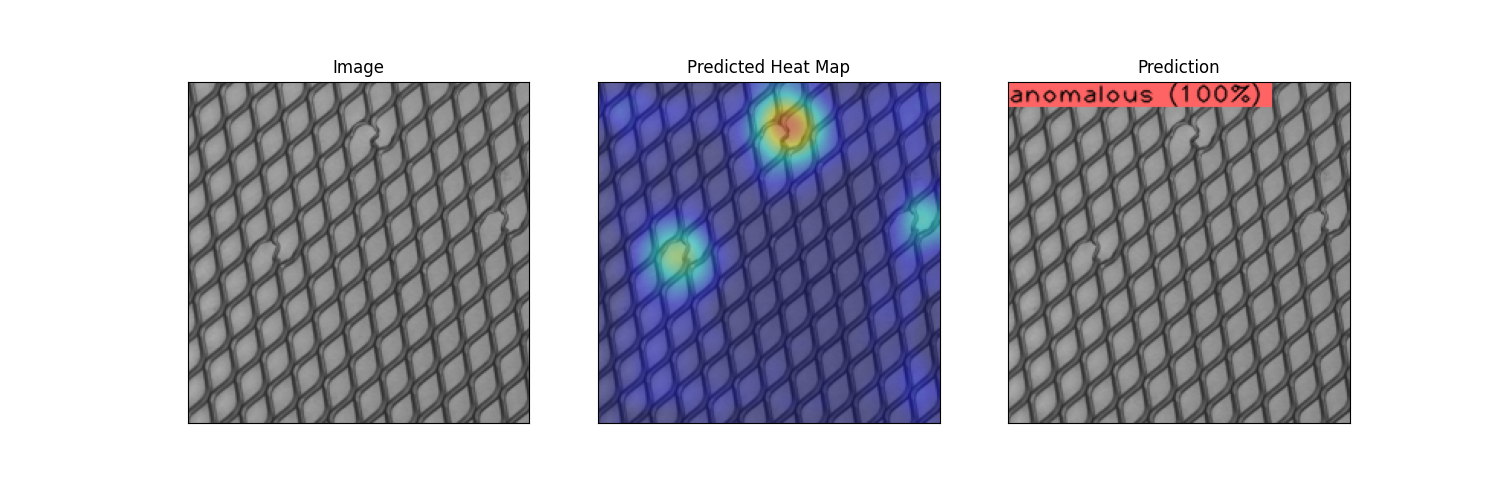

In [ ]:
# Example grid image + heatmap + prediction
img = Image.open(
    "./results/Patchcore/gridtest/latest/images/eng-ai-agents/assignments/assignment2b/datasets/MVTec/grid/test/bent/003.png"
)
img.show()

The below cell tests the grid model fit above, and shows the AUROC score to be 1.0, meaning it caught all the anomalous images.

In [ ]:
# AUROC score for grid is 1.0
grid_test_results = gengine.test(model=gmodel, datamodule=griddatamodule)

F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │            1.0            │
│       image_F1Score       │            1.0            │
└───────────────────────────┴───────────────────────────┘

The following few cells are largely the same as everything earlier in the notebook, just with a different input. In this case, rather than checking for anomalous 'grid' images, the model below is checking for anomalous 'leather' images.

In [3]:
leatherdatamodule = Folder(
    name="leathertest",
    root="datasets/MVTec/leather",
    normal_dir="train/good",
    normal_test_dir="test/good",
    abnormal_dir="test/color",
    mask_dir="ground_truth/color",
    task="classification",
)

leatherdatamodule.setup()

In [ ]:
leathermodel = Patchcore()
lengine = Engine(task="classification", pixel_metrics='AUROC')

# Train the model
lengine.fit(datamodule=leatherdatamodule, model=leathermodel)

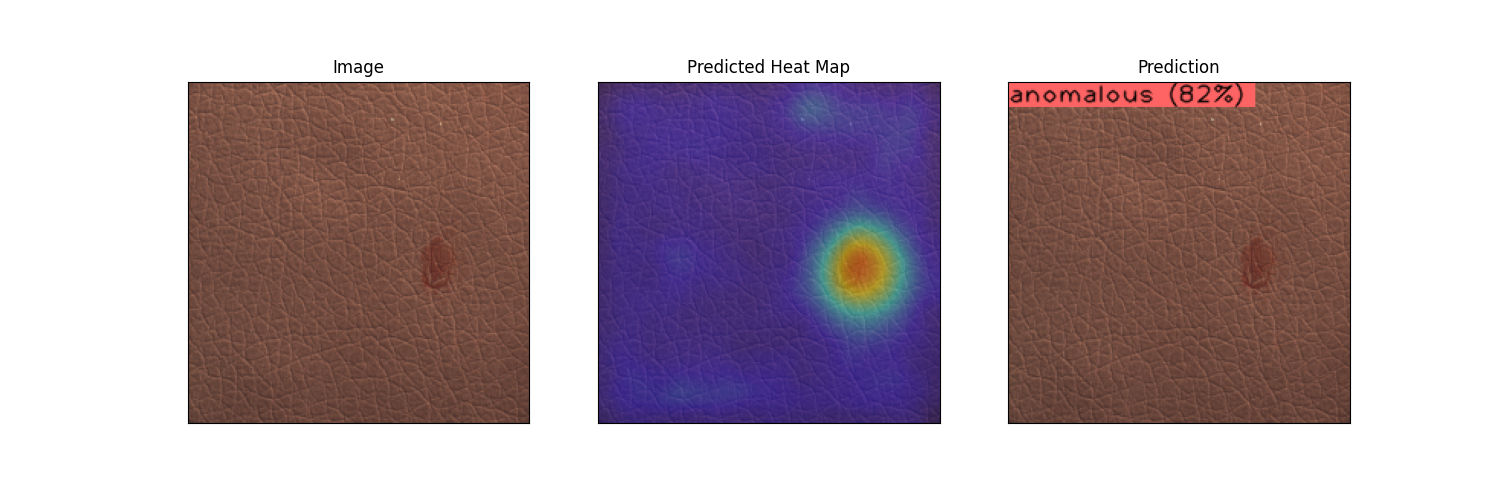

In [ ]:
# Example leather image + heatmap + prediction
img = Image.open(
    "./results/Patchcore/leathertest/latest/images/eng-ai-agents/assignments/assignment2b/datasets/MVTec/leather/test/color/008.png"
)
img.show()

In [ ]:
# AUROC score for leather is 1.0
leather_test_results = lengine.test(model=leathermodel, datamodule=leatherdatamodule)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │            1.0            │
│       image_F1Score       │            1.0            │
└───────────────────────────┴───────────────────────────┘

Another PatchCore model, but for the 'tile' class of images.

In [2]:
tiledatamodule = Folder(
    name="tiletest",
    root="datasets/MVTec/tile",
    normal_dir="train/good",
    normal_test_dir="test/good",
    abnormal_dir="test/crack",
    mask_dir="ground_truth/crack",
    task="classification",
    image_size=(256, 256)
)

tiledatamodule.setup()

In [ ]:
tilemodel = Patchcore()
tengine = Engine(task="classification", pixel_metrics='AUROC')

# Train the model
tengine.fit(datamodule=tiledatamodule, model=tilemodel)

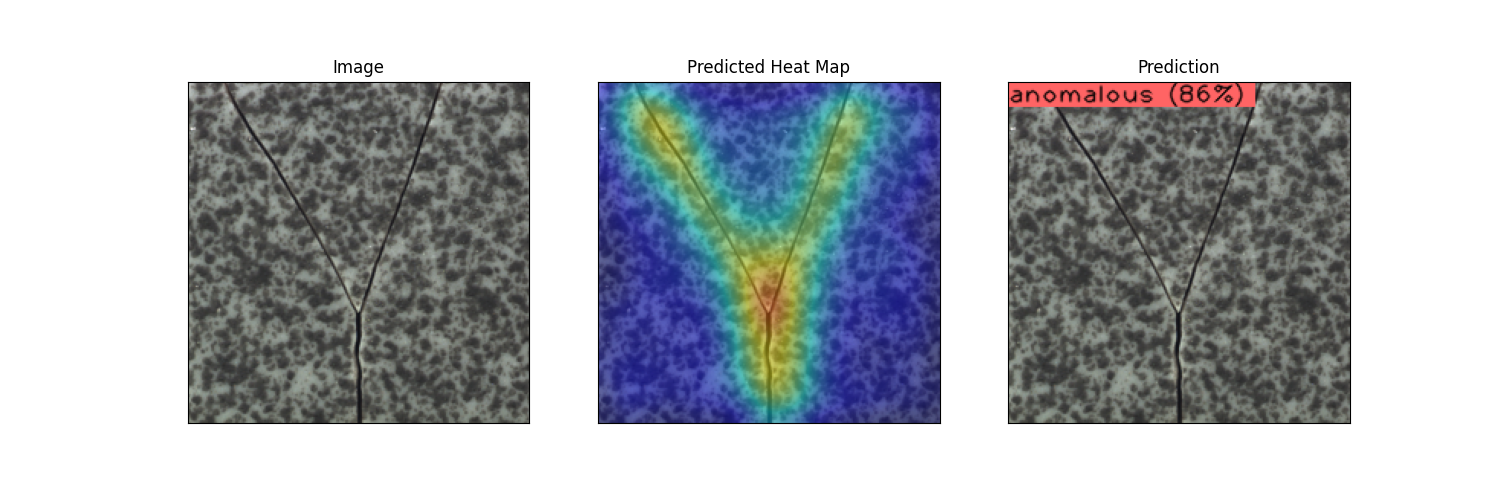

In [10]:
# Example tile image + heatmap + prediction
img = Image.open(
    "./results/Patchcore/tiletest/latest/images/eng-ai-agents/assignments/assignment2b/datasets/MVTec/tile/test/crack/001.png"
)
img.show()

In [ ]:
# AUROC score for tile is 1.0
tile_test_results = tengine.test(model=tilemodel, datamodule=tiledatamodule)

F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │            1.0            │
│       image_F1Score       │            1.0            │
└───────────────────────────┴───────────────────────────┘

Overall, each model got an AUROC score of 1.0, so the overall AUROC score across all categories is also 1.0